In [17]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
# Read the City and Ride Data
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Import the data into a Pandas DataFrame
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
mergedDF = pd.merge(ride_df, city_df, how="inner", on=["city", "city"])

# Display the data table for preview

mergedDF.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [ ]:
#READ ME
#
#
#
#   there is a computational error somewhere early in the dataset that I
#   have not been able to debug preventing me from getting the exact same
#   numbers as those in the example. They are very close, however, and I 
    # believe they are still an accurate represtnation of the data. 























## Bubble Plot of Ride Sharing Data

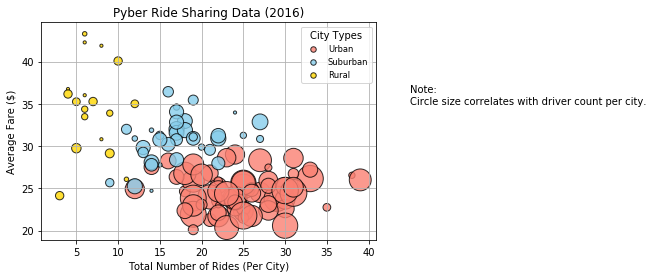

<Figure size 432x288 with 0 Axes>

In [18]:
# find x and y coordinates for 3 three city types
urban_cities = mergedDF[mergedDF["type"] == "Urban"]
suburban_cities = mergedDF[mergedDF["type"] == "Suburban"]
rural_cities = mergedDF[mergedDF["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city", "type"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

# 3 scatter plots for city types = bubble chart 

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="salmon", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

# graph title, axes labels, place grid
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# graph legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# note on bubble sizes
plt.text(45, 35, "Note:\nCircle size correlates with driver count per city.")

# Show plot
plt.show()

# Save Figure
plt.savefig("../bubblechart.png")

## Total Fares by City Type

In [19]:
# color and labels for  all 3 pie charts 
colors = ["gold","skyblue","salmon"]
labels = ["Rural", "Suburban", "Urban"]

# calculate percentages for pie chart
type_percents = 100 * mergedDF.groupby(["type"]).sum()["fare"] / mergedDF["fare"].sum()

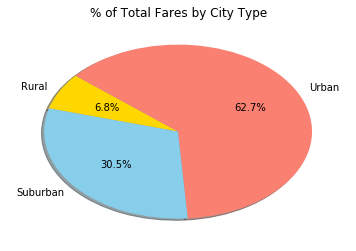

In [20]:
#plot 1st pie chart
plt.pie(type_percents, labels=labels, 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#title 
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../farescitytype.png")
######explode = (0, 0, 0,0.1,0.1,0.2,0.3,0.4,0.6)

## Total Rides by City Type

In [21]:
# calculate percentages for pie chart
ride_percents = 100 *mergedDF.groupby(["type"]).count()["ride_id"] / mergedDF["ride_id"].count()


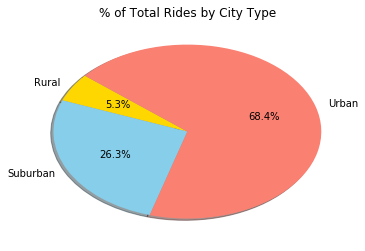

In [22]:
#plot 
plt.pie(ride_percents, labels=labels, 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#title
plt.title("% of Total Rides by City Type")

#save
plt.savefig("../ridescitytype.png")

## Total Drivers by City Type

In [23]:
# calculate percentages for pie chart
driver_percents = 100 * mergedDF.groupby(["type"]).sum()["driver_count"] / mergedDF["driver_count"].sum()



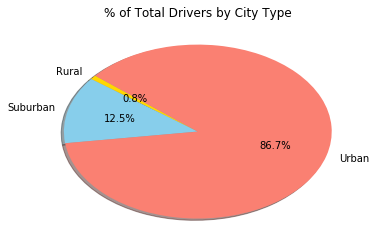

In [24]:
#plot
plt.pie(driver_percents, labels=labels,
        colors=colors,  autopct="%1.1f%%", shadow=True, startangle=140)

#title
plt.title("% of Total Drivers by City Type")

#save
plt.savefig("../driverscitytype.png")



In [ ]:
##################################
####################################
###################################
####################################3
###################################

#1.	Urban cities have a greater number of drivers, likely because of a bigger
#need for ride sharing, but cheaper average prices. 

#2.	Rural environments, while having less rides, tend to be more expensive
#than Urban and Suburban rides, potentially due to longer
#distances between pickup and dropoff points. 

#3.	Despite having a proportionately small number of total drivers, suburban
#drivers receive a large chunk of the total revenue. 

